In [11]:
import json
import matplotlib.pyplot as plt

def load_tournament_data(filename="tournament_scores.json"):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    players = data["players"]
    discount = data["discount"][0]
    payoff_p1 = data["payoff_player1"][0]
    payoff_p2 = data["payoff_player2"][0]
    results = data["results"]

    return players, discount, payoff_p1, payoff_p2, results

def plot_all_matches_in_mode(filename, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]
        scores = match["modes"][mode]["scores_p1"]
        running_total = [sum(scores[:i+1]) for i in range(len(scores))]
        plt.plot(range(1, len(scores)+1), running_total, label=f"{p1} vs {p2}")

    plt.title(f"All Matches — Game Mode {mode}")
    plt.xlabel("Round")
    plt.ylabel("Running Score (P1)")

    # Metadata textbox
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.7)
    text = f"Discount: {discount}\nPayoff P1: {payoff_p1}\nPayoff P2: {payoff_p2}"
    plt.gcf().text(0.72, 0.75, text, fontsize=10, bbox=props)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_specific_match(filename, player1, player2, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]

        if {p1, p2} == {player1, player2}:
            m = match["modes"][mode]
            scores1 = m["scores_p1"] if p1 == player1 else m["scores_p2"]
            scores2 = m["scores_p2"] if p1 == player1 else m["scores_p1"]

            plt.plot(range(1, len(scores1)+1), scores1, label=player1)
            plt.plot(range(1, len(scores2)+1), scores2, label=player2)
            plt.title(f"{player1} vs {player2} — Game Mode {mode}")
            plt.xlabel("Round")
            plt.ylabel("Payoff")

            props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.7)
            text = f"Discount: {discount}\nPayoff P1: {payoff_p1}\nPayoff P2: {payoff_p2}"
            plt.gcf().text(0.72, 0.75, text, fontsize=10, bbox=props)

            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            return

    print(f"Match not found: {player1} vs {player2}")


def plot_average_scores_bar(filename, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)
    player_scores = {p: [] for p in players}

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]
        m = match["modes"][mode]
        player_scores[p1].extend(m["scores_p1"])
        player_scores[p2].extend(m["scores_p2"])

    avg_scores = {p: sum(scores) / len(scores) if scores else 0 for p, scores in player_scores.items()}

    plt.bar(avg_scores.keys(), avg_scores.values())
    plt.title(f"Avg Per-Round Scores — Game Mode {mode}")
    plt.ylabel("Average Score")
    plt.xticks(rotation=45)

    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.7)
    text = f"Discount: {discount}\nPayoff P1: {payoff_p1}\nPayoff P2: {payoff_p2}"
    plt.gcf().text(0.72, 0.75, text, fontsize=10, bbox=props)

    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


def plot_average_scores_all_modes(filename):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)
    mode_count = 6
    player_mode_scores = {p: [0]*mode_count for p in players}
    player_mode_counts = {p: [0]*mode_count for p in players}

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]

        for m in match["modes"]:
            mode = m["mode"]
            player_mode_scores[p1][mode] += sum(m["scores_p1"])
            player_mode_scores[p2][mode] += sum(m["scores_p2"])
            player_mode_counts[p1][mode] += len(m["scores_p1"])
            player_mode_counts[p2][mode] += len(m["scores_p2"])

    avg_by_mode = {
        p: [
            (player_mode_scores[p][m] / player_mode_counts[p][m]) if player_mode_counts[p][m] else 0
            for m in range(mode_count)
        ]
        for p in players
    }

    # Plot grouped bars
    x = range(mode_count)
    bar_width = 0.15
    for idx, player in enumerate(players):
        offsets = [i + bar_width * idx for i in x]
        plt.bar(offsets, avg_by_mode[player], width=bar_width, label=player)

    plt.xticks([i + bar_width*(len(players)/2) for i in x],
               [f"Mode {m}" for m in range(mode_count)])
    plt.ylabel("Avg Round Score")
    plt.title("Average Per-Round Scores per Mode")

    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.7)
    text = f"Discount: {discount}\nPayoff P1: {payoff_p1}\nPayoff P2: {payoff_p2}"
    plt.gcf().text(0.72, 0.75, text, fontsize=10, bbox=props)

    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



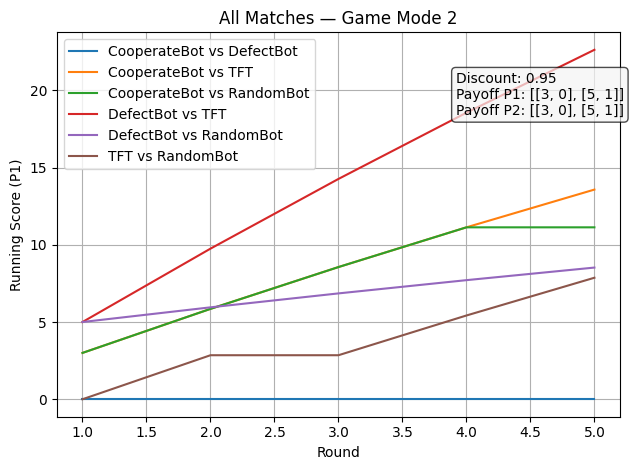

In [12]:
plot_all_matches_in_mode(filename="tournament_scores.json", mode=2)

In [ ]:
# 2. Plot specific match
plot_specific_match(filename="tournament_scores.json", player1="TFT", player2="DefectBot", mode=3)

SyntaxError: positional argument follows keyword argument (2049765376.py, line 2)

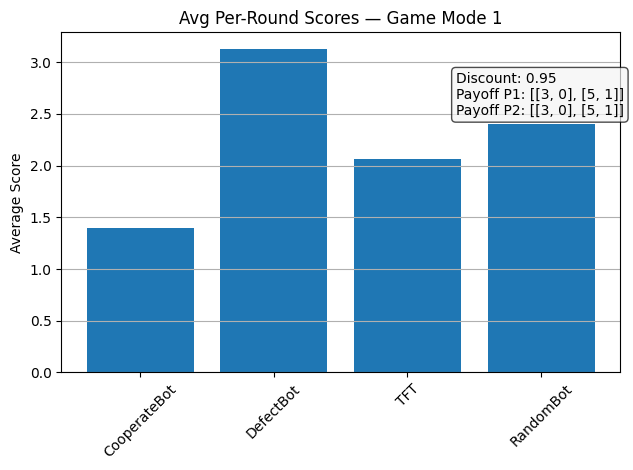

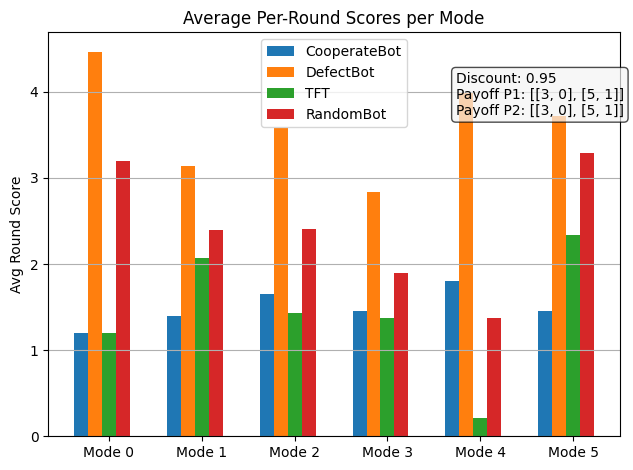

In [ ]:
# 3. Bar chart per player in one mode
plot_average_scores_bar(filename="tournament_scores.json", mode=1)

# 4. Bar chart per player across all modes
plot_average_scores_all_modes(filename="tournament_scores.json")